In [4]:
import numpy as np

In [5]:
def W(k, N, inverse=False):
    """ e^-j*2*PI*k*n/N, argument k = k * n """
    r = np.exp(-1j * (2 * np.pi / N) * k)
    if inverse:
        return np.conjugate(r)
    return r

In [8]:
def my_fft(inp, fft_size):
    out = np.array([0. + 0.j] * fft_size)
    out[0] = inp[0] + inp[1]
    out[1] = inp[0] - inp[1] * W(0, fft_size)
    return out

fft_size = 2
input_signal = [0.1 + 0.1j, 0.2 + 0.2j]

print(my_fft(input_signal, fft_size))
print(np.fft.fft(input_signal, fft_size))


[ 0.3+0.3j -0.1-0.1j]
[ 0.3+0.3j -0.1-0.1j]


In [16]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 5
import numpy as np
np.random.seed(0)
from pyhacores.utils import *
from pyha import *
import scipy
from scipy import signal

import warnings
warnings.filterwarnings('ignore') # because they include system path -> fails unit tests on different computer

simulations = ['MODEL', 'PYHA']

In [17]:
from pyhacores.fft import R2SDF
from pyhacores.fft.util import *
from pyhacores.fft.packager import DataWithIndex, Packager, unpackage, package
from scipy.fftpack import fft, fftshift

fft_size = 4
input_signal = np.array([0.1 + 0.1j, 0.2 + 0.2j, 0.3 + 0.3j, 0.4 + 0.4j])
bitrev_input_signal = toggle_bit_reverse(input_signal, fft_size)
print(input_signal)
print(bitrev_input_signal)

[0.1+0.1j 0.2+0.2j 0.3+0.3j 0.4+0.4j]
[0.1+0.1j 0.3+0.3j 0.2+0.2j 0.4+0.4j]


In [37]:
with Sfix._float_mode:
    dut = R2SDF(fft_size, twiddle_bits=18, input_ordering='natural')
    norm_sims = simulate(dut, input_signal, output_callback=unpackage, input_callback=package, simulations=simulations)
    
    dut = R2SDF(fft_size, twiddle_bits=18, input_ordering='bitreversed')
    rev_sims = simulate(dut, bitrev_input_signal, output_callback=unpackage, input_callback=package, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


natural
100%|██████████| 14/14 [00:00<00:00, 1654.37it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!
INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...



rev
100%|██████████| 14/14 [00:00<00:00, 1944.06it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


In [38]:
snr(np.array(norm_sims['MODEL']), norm_sims['PYHA'])

12.897066815373236

In [39]:
snr(np.array(rev_sims['MODEL']), norm_sims['MODEL'])

inf

In [27]:
snr(np.array(norm_sims['MODEL']), rev_sims['PYHA'])

11.262153021895605

In [28]:
snr(np.array(rev_sims['MODEL']), rev_sims['PYHA'])

inf

In [24]:
print(np.array(norm_sims['MODEL']))
print(np.array(norm_sims['PYHA']))
print(np.array(rev_sims['PYHA']))

[[ 2.5000000e-01+2.5000000e-01j -5.0000000e-02-5.0000000e-02j
  -1.0000000e-01+6.9388939e-18j  6.9388939e-18-1.0000000e-01j]]
[[ 2.5000000e-01+2.5000000e-01j -5.0000000e-02-5.0000000e-02j
  -1.0000000e-01+6.9388939e-18j  6.9388939e-18-1.0000000e-01j]]
[[ 2.5000000e-01+2.5000000e-01j -1.0000000e-01-1.0000000e-01j
  -5.0000000e-02+6.9388939e-18j  6.9388939e-18-5.0000000e-02j]]


In [29]:
snr(np.array(fft_sims['MODEL']), fft_sims['PYHA'])

inf

In [30]:
rev_input = toggle_bit_reverse(input_signal, 

In [31]:
with Sfix._float_mode:
    dut = R2SDF(fft_size, twiddle_bits=18, input_ordering='bitreversed')
    fft_sims = simulate(dut, rev_input, output_callback=unpackage, input_callback=package, simulations=simulations)

INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 14/14 [00:00<00:00, 1755.25it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


In [32]:
snr(np.array(fft_sims['MODEL']), fft_sims['PYHA'])

inf

In [196]:
dut = R2SDF(fft_size, twiddle_bits=18, inverse=True)
sims = simulate(dut, np.array(fft_sims['PYHA']).flatten(), output_callback=unpackage, input_callback=package, simulations=simulations)


INFO:sim:Converting model to hardware types ...
INFO:sim:Running "MODEL" simulation...
INFO:sim:OK!
INFO:sim:Converting simulation inputs to hardware types...
INFO:sim:Running "PYHA" simulation...


100%|██████████| 1029/1029 [00:00<00:00, 2923.06it/s]

INFO:sim:OK!
INFO:sim:Simulations completed!


In [197]:
snr(np.array(sims['MODEL']), sims['PYHA'])

-0.6112972156965196

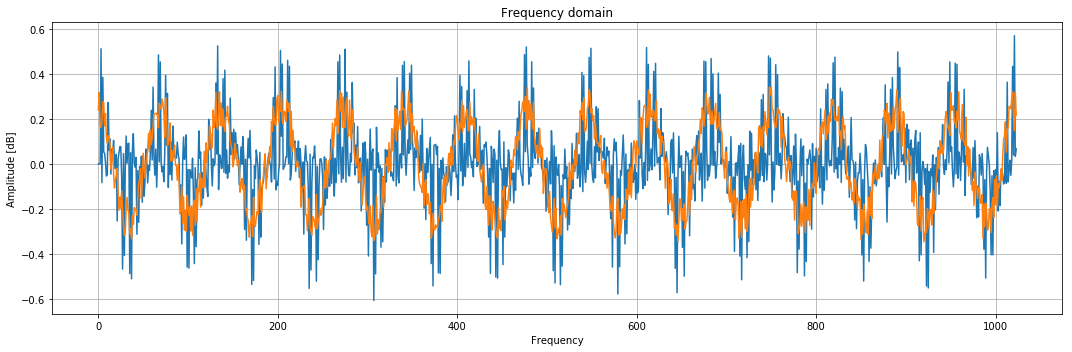

In [198]:
plt.title('Frequency domain')
# for key, value in sims.items():
# plt.plot(np.array(sims['MODEL']).flatten())
plt.plot(np.array(sims['PYHA']).flatten())
plt.plot(input_signal)

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
# plt.ylim([-120, 1])
show_plot()

## Hanning

In [7]:
dut = Windower(N, window='hanning', coefficient_bits=9)
sims = simulate(dut, input_signal, output_callback=unpackage, input_callback=package, simulations=simulations)

NameError: name 'Windower' is not defined

In [ ]:
plt.title('Frequency domain')
for key, value in sims.items():
    plt.plot(*make_fft(value[0]))

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
plt.ylim([-120, 1])
show_plot()

## Hamming

In [ ]:
dut = Windower(N, window='hamming', coefficient_bits=9)
sims = simulate(dut, input_signal, output_callback=unpackage, input_callback=package, simulations=simulations)

In [ ]:
plt.title('Frequency domain')
for key, value in sims.items():
    plt.plot(*make_fft(value[0]))

plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency')
plt.ylim([-120, 1])
show_plot()

# Limitations

## Fixed-point
Expects standard FPGA Fixed point format i.e 18 bits (incl. sign) and scaled to -1...1 range.

In [ ]:
print(f'Minimum number representabe: {2**-17}')

## Coefficients are stored in LUTs (as constants)
Storing 18bit coefficnets for large FFT can take huge amounts of LUTS. I recommend using bitwidth of ~8, then synthsis tool can compress most of them.

## FFT outputs are bitreversed, IFFT inputs expected to be bitreversed

## Scaling is different from numpy
Numpy does not scale the FFT and scales IFFT with 1/n. This core works in oppsite way i.e. FFT is scaled with 1/n and IFFT has no scaling.

# Synthesis
Resource usage depends heavily on filter taps. For example, 64 tap halfband filter needs only 16 multipliers (18bit). Complex signal needs 2 filters, so in total we could expect 32 multipliers (18bit).

In [ ]:
# NBVAL_IGNORE_OUTPUT
c = convertToVHDL(dut, '/tmp/pyha_output')
_ = c.make_quartus_netlist()

In [ ]:
print(f'Logic elements: {c.last_logic_elements}')
print(f'Memory: {c.last_memory_bits}')
print(f'Multipler (18bit): {c.last_multiplier//2}')